# Representasjon av tall på datamaskin

På en datamaskin kan vi kun lagre et endelig antall siffer.
Av fysiske årsaker er det både enklest og mest sikkert å bygge 
datamaskiner slik at informasjon representeres med tallene $0$ og $1$. Desverre
er dette krevende for mennesker å lese. Denne interessekonflikten løses
i informatikken ved konseptet abstraksjon - programmer skrevet på
et nivå, tar kun hensyn til *hva* programmer på nivået under gjør, ikke *hvordan* de gjør det.
Et godt eksempel er når du leverer en bil til et verksted. Så lenge jobben blir gjort er du fornøyd, uten å tenke veldig mye på hvordan arbeidet ble utført.

<figure>
    <a href=https://slideplayer.com/slide/4949260/  rel='noopener noreferrer' target='_blank'><img src='./abstraction_layers.png' alt='abstraction layers' width='500'></a>
    <figcaption> Abstraksjonsnivå på datamaskinen. Fra https://slideplayer.com/slide/4949260/</figcaption>
</figure>

Som bruker er du gjerne vant til å forholde deg til hvordan det øverste laget i figuren brukes. Vi skal holde oss mye til laget med algoritmer og prorgammeringsspråk. I noen tilfeller trenger vi å kommunisere med operativsystemet. Dette gjøres vanligvis via enten applikasjoner som utforskeren i windows, eller en kommandolinje eller terminal. I et pythonprogram kan du bruke `os`-modulen som du i et python-program importerer med kommandoen `import os`.

For flyttall får likevel implementasjonen noen konsekvenser for hvordan de fungerer som det er greit å være klar over.
Vi skal derfor se litt på hvordan tall blir representert på datamaskinen - dette er rent orienteringsstoff. Vi skal deretter se på hva denne representasjonen fører til, og se på noen eksempler på programmer der ting går galt.

## Representasjon av flyttall














### Standardform med desimaltall
Vi kan skrive tall i titallsystemet på standarform, f.eks

$$ \underbrace{3.125}_{\text{signifikand}}\cdot10^5. $$

Tallet foran tierpotensen beskriver nøyaktighet med antall signifikante siffer. Det
har derfor fått navnet **signifikand**. Sammen med tierpotensen bestemmer den verdien på tallet. Siden grunntallet 10 er fast
i alle tall på standarform, er signifikanden og eksponenten tilstrekkelig informasjon for å representere tallet.

I tallet $3.125$ kalles tallet $3$ for **mest signifikante siffer**. Tallet $5$ kalles **minst signifikante siffer**.

Husk at et tall $a$ er skrevet på standarform dersom $a$ kan skrives på formen

$$ k\cdot10^n, $$
der $1\leq k < 10$ og $n\in \mathbb{Z}$.

## Flyttall (*orienteringsstoff*)
### "Standardform" med binære tall

La $a = 1101.011_2, b = 0.0001101,$ og $c = -101.0011$  være et binære tall. Vi kan 
omskrive $a, b$ og $c$ som

\begin{align*}
a & = 1.101011_2\cdot2^{3}, \\[1.05em]
b & = 1.101_2\cdot2^{-4}, \\[1.05em]
c & = -1.01011_2\cdot2^{2}.
\end{align*}

Merk at signifikanden *alltid* har $1$ som mest signifikante siffer (dvs tallet til venstre for komma!). Derfor trenger
vi ikke representere denne på datamaskinen. Vi lagrer kun sifrene bak kommaet.

Datamaskinen kan bare representere et endelig antall bits. Derfor må det gjøres noen begrensninger. Man har valgt å
bruke 64 bits til å representere et flyttall. Av disse brukes 53 bits til å representere desimaldelen av signifikanden, hvor det
første sifferet representerer fortegnet. Deretter må vi ha én bit til å representere fortegnet i eksponenten, som gir
10 bits til å representere eksponentens tallverdi.

### Fordeling av flyttall på datamaskin

På bildet under ser du tettheten av flyttall.
Siden signifikanden har 52 bits uten hensyn til fortegnet, er det altså
$\displaystyle \sum_{k=0}^{52}2^k = 2^{52} - 1$ antall punkter som skal fordeles jevnt i
et intervall $\displaystyle\left[2^{n},\; 2^{n+1}\right)$. Antall
punkter holdes konstant mens bredden på intervallene vokser. Derfor ligger flyttallene tettest inne med origo, og avstanden mellom hvert flyttall øker ettersom vi beveger oss lengre unna origo.

<figure>
   <img src='./power_two_density.png' alt='Powers of two - density' width='500'>
    <figcaption> Tetthet av toerpotenser i intervallet [0, 1].</figcaption>
</figure>

In [1]:
# Demonstrasjon av avrundingsfeil ved addisjon av et stort og et lite tall
a = 1E10
b = 1E-7

print(a == a + b)

True


In [5]:
# implementasjon av eksempel i boken [7]
# Demonstrerer avrundingsfeil ved subtraksjon av to svært like tall
# liten absolutt feil, men stor relativ feil!
a = 100000.00000000000
b =  99999.999999999999
diff =   0.000000000001
print('a - b:                    %.24f' % diff)
error_estimate = diff - (a - b)
print("beregnet a - b:          ", f'{(a - b):.24f}')
print("estimat på relativ feil: ", error_estimate/diff)
print(a - b == 0)
print(a == b)

a - b:                    0.000000000001000000000000
beregnet a - b:           0.000000000000000000000000
estimat på relativ feil:  1.0
True
True


beregnede nullpunkter med abc-formel
x1: 80000000000.00037     x2: -0.0003725290298461914

faktiske funksjonsverdier i nullpunktene:
f(x1) = 1328.0           f(x2) = 197.67761230454926


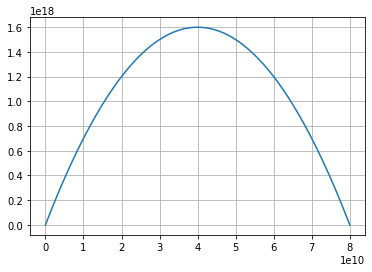

In [46]:
from pylab import *
# Løsning av andregradslikninger der b^2 dominerer -4ac

a = -1E-3
b = 8E7
c = 3E4

D = b**2 - 4*a*c
x1 = (-b - sqrt(D))/(2*a)
x2 = (-b + sqrt(D))/(2*a)

x = linspace(-abs(min(x1, x2)), abs(max(x1,x2)), int(1E2))

def f(x):
    return a*x**2 + b*x + c

print("beregnede nullpunkter med abc-formel")
print(f"x1: {x1}     x2: {x2}")
print()

print("faktiske funksjonsverdier i nullpunktene:")
print(f"f(x1) = {f(x1)}           f(x2) = {f(x2)}")

y = f(x)

plot(x, y)
grid()

In [26]:
from pylab import sqrt
x = 5.45E9
y = 75

a = x**2 + y**2
a = a - x**2

if not (a==y**2):
    print(a==y**2)
    print('absolutt feil: ', a - y**2)
    print('relativ feil:  ', abs(a)/(y**2))
    print()

print('sjekk om x**2 + y**2 == x**2')
print(x**2 + y**2 == x**2)
print()

print('sjekk om sqrt(x**2 + y**2) == x')
print(sqrt(x**2 + y**2) == x)

False
absolutt feil:  -1529.0
relativ feil:   0.7281777777777778

sjekk om x**2 + y**2 == x**2
False

sjekk om sqrt(x**2 + y**2) == x
True


## Kilder
[[1] - Von neumann arkitektur](https://www.computerscience.gcse.guru/theory/von-neumann-architecture) - https://www.computerscience.gcse.guru/theory/von-neumann-architecture

[[2] - RAM - howstuffworks](https://computer.howstuffworks.com/ram.htm) - https://computer.howstuffworks.com/ram.htm

[[3] - Intel 64 and IA-32 Architecture Software Developer Manuals](https://software.intel.com/en-us/articles/intel-sdm) - https://software.intel.com/en-us/articles/intel-sdm

[[4] - K. Mørken - *Numerical Algorithms and Digital Representation*](https://www.uio.no/studier/emner/matnat/math/MAT-INF1100/h17/kompendiet/matinf1100.pdf)

[[5] - CS152 - Slideshare](https://slideplayer.com/slide/4949260/) - https://slideplayer.com/slide/4949260/

[6] - D.Harris, S.Harris, *Digital Design and Computer Architecture*, 2. utgave, Elsevier.

[7] - A.C Faul, *A Concise Introduduction to Numerical Analysis*, CRC-Press.